# Classical Statistical Inference: Uncertainty calculation

## Table of Content:

See [Basic-statistics_01.ipynb](Basic-statistics_01.ipynb) for a recap of the basic probability concepts and [Basic-statistics_02.ipynb](Basic-statistics_02.ipynb) for manipulation of pdf and cdf in python and how to use them to generate synthetic data (*Monte-Carlo* methods).    

This notebook first introduces the concept of "point estimate" in statistics and explains how the "standard error on the mean" is defined. If you think that the uncertainty associated to an ensemble of measurements is given by the standard deviation on those measurements, then you need to carefully practice this notebook. Second, this Notebook addresses the question: How do you proceed to estimate the error on a quantity that is not directly observable (i.e. is a function of variables on which you have an uncertainty estimate). A solution is through the use of Monte-Carlo techniques to estimates uncertainties (we abusively call this error but uncertainty is a more appropriate terminology).   

- I.7 [Sample Statistics and error on the mean](#I.7-Sample-statistics-and-error-on-the-mean)
    * I.7.1 [Estimator of the mean](#I.7.1-Estimator-of-the-mean:)
    * I.7.2 [Estimator of the standard deviation](#I.7.2-Estimator-of-the-Standard-deviation:)
    * I.7.3 [Standard error on the mean](#I.7.3-Standard-error-on-the-mean)
- I.8 [Monte Carlo methods and error estimates](#I.8-Monte-Carlo-methods-and-error-estimates)
    * I.8.1 [Variable transformation](#I.8.1-Variable-transformation)
    * I.8.2 [(Standard) Error propagation formula](#I.8.2-Error-estimate-and-Error-propagation-formula:)

- X. [References and supplementary material](#X)

In [1]:
# Modules to be used in this notebook
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## I.7 Sample statistics and error on the mean

This section is adapted from Sect. 2 of the notebook [Descriptive_statistics_01.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_01.ipynb). While the latter notebook is optional in the context of the lecture SPAT0002-1, this section is not. 

The important thing that you have to understand is that in general, when you gather data, you *do not know* from which distribution it is drawn, and if you do (or can guess it), you do not know the parameters characterizing it (e.g. its mean, standard deviation). You need to **infer the parameters of the distribution from the data**. 

We speak of **sample statistics** when the characteristics of the distribution are deduced **from the data**. If we assume that we have $N$ measurements ${x_i}$, then we can calculate **estimators** of the various quantities characterizing a distribution (assuming for the moment that the uncertainty of $x_i$ is negligible - a measurement of $x$ is a delta function-, or at least much smaller than the range of $x_i$) describing the pdf. 


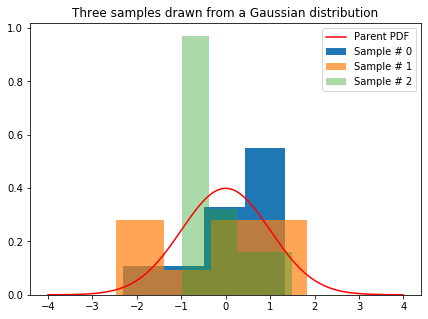

In [2]:
# If we take a canonical normal distribution 
g = scipy.stats.norm(0, 1)
nsamp = 10   # number of elements in the sample 

# Let's generate a random sample 
y_samp = g.rvs(nsamp)

# Let's consider 2 other random samples 
y_samp_2 = g.rvs(nsamp)
y_samp_3 = g.rvs(nsamp)

# Let's compare the different samples 
f, ax = plt.subplots(ncols=1, figsize=(7, 5))
for i, y in enumerate([y_samp, y_samp_2, y_samp_3]):
    plt.hist(y, label='Sample # %i'%i, bins=4, alpha = 1 - i*0.3, density=True )
x = np.arange(-4,4, 0.01)
ax.plot(x, g.pdf(x), color='red', label='Parent PDF')
plt.title('Three samples drawn from a Gaussian distribution')
ax.legend()

### I.7.1 Estimator of the mean:

If you have sample of $N$ data points $x = \{x_1, x_2, ..., x_N\}$, then the estimator of the mean $\hat \mu$ is: 

$$
\hat{\mu} \, =\, {\bar{x}} = \sum_{i=1}^{N} \frac{x_i}{N}
$$

There are various notations for the estimator of the mean. Our [book](#book) uses $\bar{x}$, but I prefer the abusive notation that adds a "hat" ($\hat{ }$) on top of the estimated quantity (i.e. estimated based on the data). You may also find $\hat{x}$ for the estimator of the mean. This is an "abusive notation" because ${\hat{\theta}}$ is in principle reserved (in books of statistics) to the MLE (maximum likelihood) estimator of a parameter. In many situations, both are identical (e.g. estimator mean of a gaussian is equal to its MLE estimator).

**Illustration** Let's consider 10 data points drawn from a normal distribution $N(0,1)$. If you only have the data point in hands, you will get an *estimate* of the mean from those data point. This *estimator of the mean* will not be equal to the "true" mean of the distribution (which in the present case is "0"). Run the cell below.  

In [3]:
# The (true) mean of the distribution is: 
print('The mean of the distribution is %.2f' %g.mean())

# The sample mean can be calculated for a sample drawn from that distribution; let's take a sample of 10 values
print('The estimator of the mean for my sample y_samp of 10 points is %.2f' %y_samp.mean())

The mean of the distribution is 0.00
The estimator of the mean for my sample y_samp of 10 points is 0.20


### I.7.2 Estimator of the Standard deviation:

For a sample of $N$ data points $x = \{x_1, x_2, ..., x_N\}$, the estimator of the standard deviation is: 

$$
\hat{\sigma} = \,s \, = \sqrt{\frac{1}{N-1}} \, \sqrt{ \sum_{i=1}^{N} (x_i-\bar{x})^2} 
$$

Note here the factor N-1 because, said shortly, we have already used 1 d.o.f.  to estimate ${\bar{x}}$. Thanks to this "correction", $s^2$ is an *unbiased* estimator of the variance. 

Also, keep in mind that $s$ IS NOT the error on $\bar{x}$. The error on $\bar{x}$ is the stde and is defined in the next section. 

#### Variance and std calculation with numpy

The variance in numpy is the average of the squared deviations from the mean, i.e., $\sigma^2 = \rm{mean}(\rm{abs}(x -$ `x.mean()`$)^2)$, where the mean is calculated as `x.sum()`$/ N$, where $N = $`len(x)`. If, however, `ddof` is specified (i.e. `np.var(x, ddof)`), the divisor $N - {\rm ddof}$ is used instead. The same is true for the calculation of the standard deviation  `np.std(x, ddof=1)`. By default ddof=0.

=> If you want to have a "proper" estimation of the standard deviation and variance (i.e. w. $N-1$ at the denominator)  use `np.var(x, ddof=1)` and `np.std(x, ddof=1)`. 


### I.7.3 Standard error on the mean

The error on $\bar{x}$ is given by the **standard error on the mean** which is given (for large $N$ and ${\bar{x}}$ following a gaussian distribution) by:

$$
stde = \sigma_{\bar{x}}= \frac{s}{\sqrt{N}}
$$

This is a **consequence of the central limit theorem**: i.e. when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed. More precisely, for a population (sample) drawn from a distribution $h(x)$ (of finite width / variance), the mean of $N$ values drawn from that distribution follow a Gaussian $N\left(\mu, \frac{\sigma}{\sqrt{N}}\right)$

In [4]:
# The mean of the distribution is: 
print('The std of the distribution is %.2f' %g.std())
# The sample std can be calculated for a sample drawn from that distribution; let's take a sample of 10 values
print('The estimator of the std for my sample y_samp of 10 points is %.2f' %y_samp.std(ddof=1))

The std of the distribution is 1.00
The estimator of the std for my sample y_samp of 10 points is 1.14


## I.8 Monte-Carlo methods and error estimates

The random variable you are interested in is often a function of other random variables that are directly measured. A simple example in physics is the measurement of the speed of an object. You may not measure the speed directly but the distance and the time. For each time and distance you measure, you estimate have an associated uncertainty. But what you are interested in is the velocity, i.e. distance / unit of time. How do you propagate the two uncertainties to derive the uncertainty on the speed ? We'll see below how to proceed thanks to the **error propagation formula** (this is a formula you should know and apply !). But we'll also introduce a numerical approach (Monte-Carlo technique) to tackle that question. This is particularly useful if you are in a situation where you cannot easily apply the error propagation formula (you need to calculate partial derivatives on random variable), or when you suspect that this formula is not valid (it is an approximate formula). The Monte-Carlo technique is also a powerful way to numerically verify some of the formula we have/will introduced or some well known theorems of statistics.  

### I.8.1 Variable transformation

Imagine that you have a sample of magnitude measurements of an object ( $m = -2.5 * log(F)$, where $F$ is the flux). How do you estimate the mean and uncertainty on the mean ? You may be tempted to use the standard error on the mean (see [I.7.3](#I.7.3-Standard-error-on-the-mean) ), but you cannot because the magnitude is a derived quantity, the flux being what is effectively measured and for which you measure errors.    

As you may know, any function of a random variable is a random variable. Let's consider the "primal" random variable $x$ and the function $y = \phi(x)$ of the latter.    

If we know the pdf $p(x)$ (where $x$ is a random variable), then [remember](Descriptive_statistics.ipynb) that the probability distribution $p(y)$, where $y = \phi(x)$ (and so $x = \phi^{-1}(y)$), is:

$$
p(y) = P'(y) = p\left[ \phi^{-1} \left(y \right) \right] \left| \frac{{\rm d}\,\phi^{-1}(y) }{{\rm{d}} y} \right|
$$

where $P'(y)$ is the first derivative of the CDF.  

Let's consider the case where $x$ is drawn from a uniform distribution, but we study $y = -2.5*log(x)$. Then we have $x = \phi^{-1}(y) = 10^{-0.4*y} $. Since we have a uniform distribution for $x$, we have $p(x) = 1$ if $0 \leq x \leq 1$, and therefore $p(y) =  0.4\, \ln(10) \, 10^{-0.4\,y}$ with $0 \,< \,y \,<\,\infty $. 

Note that we take the absolute value of the first derivative. 

In [11]:
# create a uniform distribution
uniform_dist = scipy.stats.uniform(0.0001, 1)
x_sample = uniform_dist.rvs(1000)
# Calculate the pdf of x to overplot it
x = np.linspace(0.001, 1.5, 1000)
Px = uniform_dist.pdf(x)

In [12]:
# transform the data
y_sample = -2.5*np.log10(x_sample)
# Calculate the pdf of y to overplot it
y = -2.5*np.log10(x)
Py = 0.4 * np.log(10) * Px * 10**(-0.4*y)

Text(0, 0.5, '$p_y(y)$')

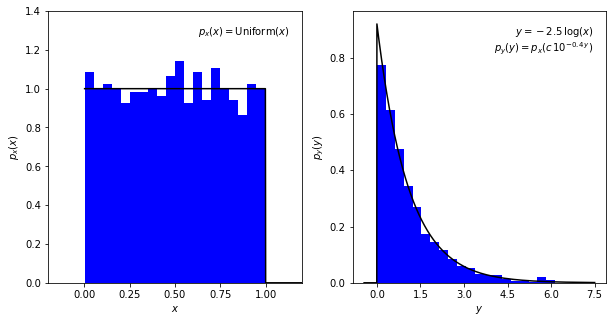

In [15]:
# Visualise the Uniform and transformed distribution 
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.hist(x_sample, 20, histtype='stepfilled', fc='blue', density=True)
ax.plot(x, Px, '-k')
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 1.4001)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, r'$p_x(x) = {\rm Uniform}(x)$', va='top', ha='right', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p_x(x)$')


ax = fig.add_subplot(122)
ax.hist(y_sample, 20, histtype='stepfilled', fc='blue', density=True)
ax.plot(y, Py, '-k')
#ax.set_xlim(0.85, 2.9)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.text(0.95, 0.95, '$y=-2.5\,\log(x)$\n$p_y(y)=p_x(c\,10^{-0.4\,y})$', va='top', ha='right', transform=ax.transAxes)
ax.set_xlabel('$y$')
ax.set_ylabel('$p_y(y)$')

### I.8.2 Error estimate and Error propagation formula:


How do you proceed if you have a function of more than one random variable ? Then, you need to use the *error propagation formula* given below. This is a **very important** formula that you need to know. Knowing the demonstration is not compulsory, but understanding it is insightful and allows you to understand the assumptions entering into the formula.   

If we have a function $z = \phi(x,y)$, where $x $ and $y$ are random variable with sample values $x_i = {x_1, ..., x_n}$ and $y_i = {y_1, ..., y_n}$, then the error on $\sigma_z$ is given by the well known **Error propagation formula**:  

$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$

*Demonstration:* 

We can define $z_i$ as $\phi(x_i, y_i)$ (i.e. $\phi$ evaluated at $(x_i, y_i)$), and $\bar{z}$ as $\phi(\bar{x}, \bar{y})$ (i.e. $\phi$ evaluated at its mean value). 

The Taylor expansion of $z$ around its average value is:

$$
z_i = \phi(\bar{x}, \bar{y}) \, + \,  \left(\frac{\partial \phi}{\partial x} \right)_\bar{x}  \, (x_i-\bar{x})+ \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y} \, (y_i-\bar{y})  ~ + ~{\rm {higher~order~terms}}
$$

If the measured values $x_i, y_i$ are close to the average, then, neglecting the higher order terms, we have:   

$$
z_i - \bar{z} = \left(\frac{\partial \phi}{\partial x} \right)_\bar{x}  \, (x_i-\bar{x})+ \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y} \, (y_i-\bar{y})
$$

We can then calculate the variance on $\Phi$ which is:    

$$
\sigma_z^2 \, = \, \sum_i^{N} \, \frac{(z_i - \bar{z})^2}{N} 
$$

Hence,    
$$
\sigma_z^2 \, = \, \frac{1}{N} \sum_i^{N} \, (x_i-\bar{x})^2 \, \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \,   +  \frac{1}{N} \sum_i^{N} \, (y_i-\bar{y})^2 \, \left (\frac{\partial \phi}{\partial y} \right)_\bar{y}^2 \,  + \frac{2}{N}  \sum_i^{N}   \, (x_i-\bar{x}) (y_i-\bar{y}) \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} 
$$

$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$

Such error estimates for non-linear functions (i.e. non linear in their variables) are biased on account of using a truncated series expansion. 

Note also that even in the simpler case where $z = \phi(x)$ (simple transformation of variable), there is no guarantee, if $x$ follows a gaussian distribution of width $\sigma_x$, that the transformed variable $z$ also follows a gaussian distribution of width $\sigma_z$. 

**Conclusions:** Although there is no explicit assumption regarding the pdf in the derivation of the "error propagation" formula, there is an implicit one which comes from neglecting higher order terms. We'll see hereafter how Monte-Carlo simulations can be used to study the distribution of a transformed variable. 

### I.8.3 Monte-Carlo Error estimate:

The methods that consists in generating random points drawn from a specific distribution function and use them for various purposes are generically classified among *Monte-Carlo* techniques. 

By using Monte-Carlo simulations, we can verify the validity of the error propagation formula, but also have a way to derive the mean value and variance of a random variable that results from a combination of several random variables. Indeed, random samples allow us to approximate a pdf by drawing a virtually infinite samples from it. This means that:

$$
E(f(x)) \, = \, \int\limits_{-\infty}^{+\infty} f(x) h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N f(x_i),
$$

where $x_i$ is a random number drawn from the distribution $h(x)$, which, for the purpose of Monte-carlo simulations, is a uniform distribution ($h(x) = 1/(b-a)$).   
If we specialize that formula for the mean, we have:

$$
\mu = \int_{-\infty}^{+\infty} x \,h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N x_i,
$$

and the variance

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, h(x) dx \rightarrow \frac{1}{N}\sum\limits_i^N (x_i - \hat{\mu})^2
$$

It's basically as if we did our experiment nearly infinitely many times.


- Let's first apply the Monte-carlo approach to the simple case of the sum of two random variables ($a$ and $b$) drawn from a gaussian distribution, and compare the result to the Gaussian distribution we derive from std error propagation formula:

    * **z = a + b**

*Standard error propagation:*

$\sigma_z^2 = \left(\frac{\partial z}{\partial a}\right)^2 \sigma_a^2 + \left(\frac{\partial z}{\partial b}\right)^2 \sigma_b^2$

$\Longrightarrow \sigma_z^2 =  \sigma_a^2 + \sigma_b^2$

The comparison between the two methods is given as an **Exercise**. Follow the different steps outlined in the next 2 cells

Text(0.5,1,'Distribution of the MC sample')

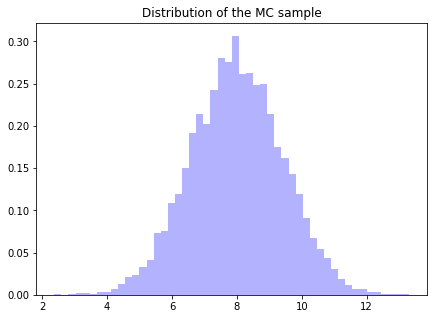

In [19]:
# EXERCISE 
# Define 2 random variable a drawn from N(mu_a, sigma_a)  and b drawn from N(mu_b, sigma_b)

# We give values to mu_a, mu_b, sigma_a, sigma_b
mu_a, sigma_a = 5., 1.
mu_b, sigma_b = 3., 1.

# Create an instance a of N(mu_a, sigma_a), and b of N(mu_b, sigma_b) using scipy.stats.norm()
a = scipy.stats.norm(mu_a, sigma_a)
b = scipy.stats.norm(mu_b, sigma_b)

# Generate a random sample of 10000 points for each distribution 
sample_a = a.rvs(10000)
sample_b = b.rvs(10000)
# Our random variable z is the sum of the 2 random variables a and b 
# => we generate a sample of z which is the sum of sample_a and sample_b
sample_z = sample_a + sample_b

# Visualize the distribution of the Monte-Carlo sample you just created  
plt.figure(figsize=(7, 5))
z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC')
plt.title('Distribution of the MC sample')

Error from error propagation: z = 8.00 +- 1.41
MC Error: z = 8.01 +- 1.42


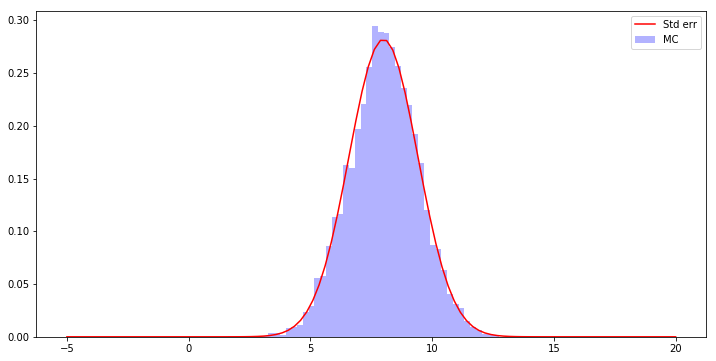

In [11]:
# We want to compare the Monte-carlo to error propagation formula expectation 
# => we create, for comparison, z drawn from N(mu_z, sigma_z) with mu_z and sigma_z given by error propagation
mu_z, sigma_z = (mu_a + mu_b), np.sqrt(sigma_a**2 + sigma_b**2)  # error propagation formula
z = scipy.stats.norm(mu_z, sigma_z)

# Plot the distribution of your Montecarlo sample and overplot the PDF of the N(mu_z, sigma_z) distribution 
# with (mu_z, sigma_z) given by the error propagation formula 
plt.figure(figsize=(7, 5))
z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC') # Plot the MC sample
x = np.linspace(-5, 20, 100)
plt.plot(x, z.pdf(x), color='red', label='Error propagation')     # PDF from error propagation
plt.legend()

# Calculate the estimate of the mean and std from the error propagation 
sample_mu_z = np.mean(sample_z)
sample_sig_z = np.std(sample_z)

# Print the values of the estimate of the mean and std from the error propagation and those derived with MC
# Do they agree ? 
print("Error from error propagation: z = %1.2f +- %1.2f" % (mu_z, sigma_z) ) 
print("MC Error: z = %1.2f +- %1.2f" % (sample_mu_z, sample_sig_z) )

**Exercise**

Generate e.g. N = 10000 samples of random variables of e.g. n=30 points, to verify that the error you do by estimating the mean of a Gaussian distribution is $stde \, = \, \sigma_\bar{x} = \, s / \sqrt{n}$, where $n$ is the number of points used to estimate the mean $\bar{x}$. 
For simplicity work with a normal distribution N(0,1).

Bonus:    
What is the distribution of the sample variance ($\sigma^2_{\bar x}$) and what is the error you do on the variance ? 

Remember: 
If the sample contains $n$ data points:    
=> The **sample mean** is effectively distributed as a **normal distribution $N(\mu, \sigma/\sqrt{n})$**    
=> If $s^2 = \hat{\sigma}^2$ is the **sample variance**, then $(n-1)*s^2 / \sigma^2$ is effectively distributed as a **chi2 distribution with $(n-1)$ degrees of freedom** (see [Descriptive_statistics_02.ipynb](03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb)).   
For a $N(\mu, \sigma)$ distribution, the error on the estimator of the variance is $\hat{\sigma}^2 \sqrt{2\,/(n-1)}$.      
The error on the sample **standard deviation** is $\hat{\sigma} / \sqrt{2(n-1)}$    


In [20]:
# Definition of the parent population
mu, sigma = 0, 1
norm = scipy.stats.norm(mu, sigma)
N_samples=10000  # number of samples we will draw

npt=30 # number of points of an individual sample

# let's draw N times a sample of npt points from the normal population distribution 

mean_array, var_array = np.zeros(N_samples), np.zeros(N_samples)

for i in range(N_samples):
    sample= norm.rvs(npt)
    # Let's calculate the mean and variance of the distribution and save it in two arrays 
    mean_array[i], var_array[i] = np.mean(sample), np.var(sample, ddof=1)

Text(0.5,0,'Variance')

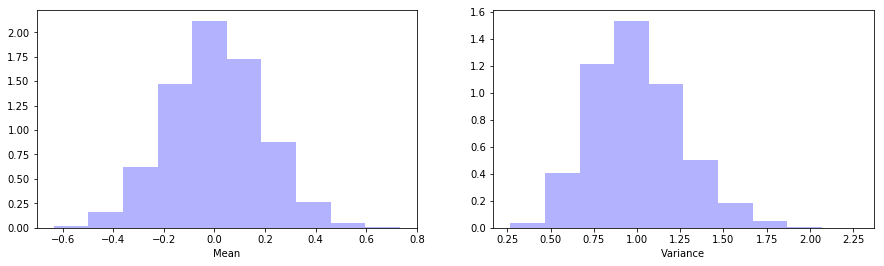

In [21]:
## PLOTTING 
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# PLOT OF THE MEAN: 
mu_hist = ax1.hist(mean_array, normed=True, color='blue', alpha=0.3, label=None)
ax1.set_xlabel('Mean')

# PLOT of the VARIANCE 

var_hist = ax2.hist(var_array, normed=True, color='blue', alpha=0.3, label=None)
ax2.set_xlabel('Variance')

Estimated mean from 30 draws: 0.00 +- 0.18
Error on the mean: MCMC 0.185 vs predicted 0.183 


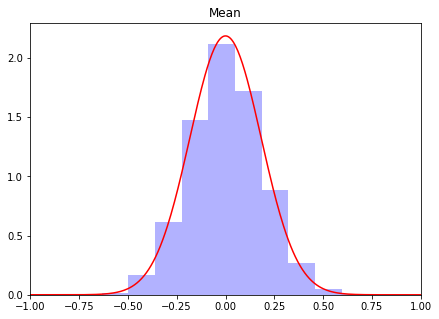

In [25]:
# Let's first look at the mean 
# MEAN
# Gaussian distribution that should reproduce the (pdf of the) sample mean
z_mean = scipy.stats.norm(mu, sigma/np.sqrt(npt))

# Overploting the mean on the distribution from the sample means 
f, ax = plt.subplots(ncols=1, figsize=(7, 5))

# PLOT OF THE MEAN: 
mu_hist = ax.hist(mean_array, bins=10, normed=True, color='blue', alpha=0.3, label=None)
# Plot the the "expected" distribution (i.e. expectation from theory)
x = np.linspace(-3, 3, 1000)
ax.plot(x, z_mean.pdf(x), color='red', label='Mean')
ax.set_xlim(mu-1, mu+1)
ax.set_title('Mean')

print("Estimated mean from %.i draws: %1.2f +- %1.2f" % (npt, np.mean(mean_array), np.std(mean_array)) ) 
print("Error on the mean: MCMC %.3f vs predicted %.3f " %(np.std(mean_array), sigma/np.sqrt(npt)) )

Estimated variance from 30 draws: 1.00 +- 0.26
Error on the variance: measured 0.260 vs predicted (from chi2) 0.262 


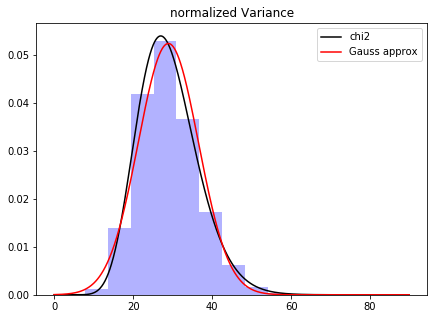

In [26]:
# Let's now look at the VARIANCE
# The distribution of the variance is NOT a normal distribution (remember distribution of sum(z^2) )
chidist = scipy.stats.chi2(df=npt-1)   # chi2 for n-1 dof  

# Distribution of the "normalised" sample variance, namely: (n-1)*S**2 / sigma^2 is a chi2 distrib. with n-1 ddof
norm_var_array = (npt-1)*var_array / (sigma**2)

# gaussian approximation for the sample (normalized) variance
z_var  = scipy.stats.norm(np.mean(norm_var_array), np.sqrt(2.*(npt-1) ))  # width of chi2 distrib is sqrt(2/k)

## PLOTTING 

f, ax2 = plt.subplots(ncols=1, figsize=(7, 5))

# PLOT of the VARIANCE (normalised )
#
# Sample normalised variance
var_hist = ax2.hist(norm_var_array, bins=10, normed=True, color='blue', alpha=0.3, label=None)
# "True" chi2 distribution associated to the variance (n-1)*S**2 / sigma^2
x2=np.arange(0, 3*npt, 0.1)
ax2.plot(x2, chidist.pdf(x2), color='black', label='chi2')

# Gaussian approximation to the normalised variance
ax2.plot(x2, z_var.pdf(x2), color='red', label='Gauss approx')
ax2.legend()

ax2.set_title('normalized Variance')

print("Estimated variance from %.i draws: %1.2f +- %1.2f" % (npt, np.mean(var_array), np.std(var_array, ddof=1)) )
print("Error on the variance: measured %.3f vs predicted (from chi2) %.3f " %(np.std(var_array, ddof=1), np.mean(var_array) *np.sqrt(2./(npt-1) ) ) ) 

# Note that when we estimate the std on of the estimator of the variance we use ddof = 1 
# because we estimate it from a distribution for which we do not know the variance
# Change npt to 5pts ... see the difference !

From this exercise, we should notice that:     
1) The width of the distribution of the mean is proportional to $1./\sqrt{N}$. This confirms the 1/sqrt(N) in estimating the error on the mean.     
2) The width of the $\chi^2$ distribution of the sample std is $\hat{\sigma} / \sqrt{2(n-1)}$.    
3) The distribution of the variance becomes normal when $n$ becomes large. For typically 20-30 points, the chi-square is well approximated by a gaussian.  

* Let's now try with the product of two random variables:  **z = a * b**

Standard Error Propagation:

$\sigma_z^2 = b^2\sigma_a^2 + a^2\sigma_b^2 = z^2\left(\left(\frac{\sigma_a}{a}\right)^2 + \left(\frac{\sigma_b}{b}\right)^2\right)$


In [12]:
# Defining the 2 distributions for rv_1= a and rv_2 = b ; here we take 2 gaussian parent distributions
mu_a, sigma_a = 1., 0.6
mu_b, sigma_b = 1., 1.

a = scipy.stats.norm(mu_a, sigma_a)
b = scipy.stats.norm(mu_b, sigma_b)
sample_a = a.rvs(10000)
sample_b = b.rvs(10000)
# let's build the random variable z = a * b
sample_z = sample_a * sample_b

Error from error propagation: z = 1.00 +- 1.17
MC Error: z = 1.01 +- 1.31


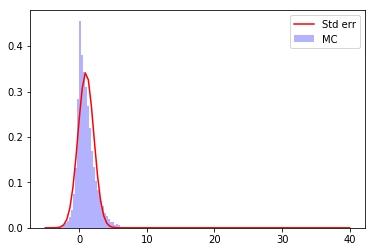

In [14]:
# let's build N(mu_z, sigma_z) where sigma_z is calculated from the error propagation formula
mu_z = (mu_a * mu_b) 
sigma_z = mu_z * np.sqrt((sigma_a / mu_a)**2  + (sigma_b / mu_b)**2)  # error propagation formula
z = scipy.stats.norm(mu_z, sigma_z)

z_hist = plt.hist(sample_z, bins=50, normed=True, color='blue', alpha=0.3, label='MC')
x = np.linspace(-5, 40, 100)
plt.plot(x, z.pdf(x), color='red', label='Std err')
plt.legend()

sample_mu_z = np.mean(sample_z)
sample_sig_z = np.std(sample_z)

print("Error from error propagation: z = %1.2f +- %1.2f" % (mu_z, sigma_z))
print("MC Error: z = %1.2f +- %1.2f" % (sample_mu_z, sample_sig_z) )

Modify the error on b in the above example, and see how the final distribution behaves. 

## XX. Summary 

We have seen (that): 

- when we calculates statistics of a distribution (we call the mean, standard deviation, moment, ... *statistics* of a distribution) based on a sample of data points, we then work with **estimators** of the statistics. 
- Estimators, as they depend on the sample in hand, are **random varible** and are therefore not known "perfectly". There are therefore uncertainties associated to those estimators, and this uncertainty generally depends on the sample size.  
- If you have a sample of N data points $x_i$, that their mean is $\bar{x}$ (that we also write $\hat{\mu}$) and standard deviation $s$, then, the uncertainty on the mean is called standard error on the mean (stde) $stde = \sigma_{\bar{x}}= \frac{s}{\sqrt{N}} $. The standard error on the mean is different from the standard deviation of your sample. 
- How the distribution of a random variable $X$ is transformed the we consider a function $Y = \phi(X)$. The change of variable formula is similar to what we use for non random variable.
- The **standard error propagation formula** allows us to calculate the uncertainty on a random variable $Z = \phi(X, Y)$.  We have:     
$$
\sigma_z^2 \, = \left( \frac{\partial \phi}{\partial x} \right)_\bar{x}^2  \sigma_x^2 \, + \left( \frac{\partial \phi}{\partial y} \right)_\bar{y}^2  \sigma_y^2  + 2  \left( \frac{\partial \phi}{\partial x} \right)_\bar{x} \left( \frac{\partial \phi}{\partial y} \right)_\bar{y} \sigma_{xy}
$$
- The **Monte-Carlo approach** can be used to estimate errors if the standard error propagation formula is suspected not to give reliable results (cf. 1st order truncation of the Taylor expansion). This method is particularly simple to implement in python as `scipy.stats.distribution.rvs()` allows one to draw samples from various univariate distributions. **Monte-Carlo** may also be used to create synthetic data sets that looks like your real data. 

## X. References and supplementary material: <a class="anchor" id="X"></a>

* **Chapter 1** (1.2), **Chapter 3** (3.1, 3.2) and **Chapter 4** (4.1 to 4.3) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/).  

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 2**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**, **Chapter 18.7** 

* Youtube videos on the topic covered here: 
    - sampling distribution and estimator: https://www.youtube.com/watch?v=z0Ry_3_qhDw
    - Standard error on the mean https://www.youtube.com/watch?v=J1twbrHel3o
